# Data Analysis

In [92]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
integer_features = ["PassengerId", "Survived", "Pclass", "SibSp", "Parch"]
categorical = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
float_features = ["Fare", "Age"]

**Search for defects in the dataset (missing values, bad data)

In [95]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We can see that Cabin only has values for 204 / 891 rows (too many missing values, might decide to scrap this column)

Age has 714 / 891 values; it is missing a lot of values but age might be an important feature. We will try to fix this.

In any case we can check for missing values in all columns:

In [96]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, the other columns have no *null* values.

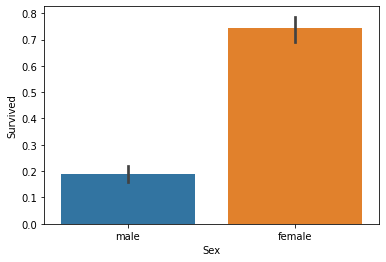

In [97]:
import matplotlib as plt
import seaborn as sns
sns.barplot(x="Sex", y="Survived", data=train);

Huge imbalance! Let's see the exact percentage.

In [98]:
survivors = train['Survived'].sum()
print(f"Number of survivors: {survivors}")

# Note: the following calculations show "Among the survivors, how many were male and how many were female"
# A different approach could be: "Among males, how many survived? Among females, how many survived?"
# The first approach, on second thought, does not take into account the initial distribution of male and female passengers
# The second approach may better put into perspective chances of survival for members of a particular sex
male_survivors_percent = train[(train['Survived']) & (train['Sex'] == 'male')]['Survived'].sum() / survivors
print(f"Percent of *male* survivors: {male_survivors_percent}")

female_survivors_percent = train[(train['Survived']) & (train['Sex'] == 'female')]['Survived'].sum() / survivors
print(f"Percent of *female* survivors: {female_survivors_percent}")

# Second approach

total_males = train[train.Sex == "male"]["Sex"].count()
total_females = train[train.Sex == "female"]["Sex"].count()
survived_females = train[(train.Sex == "female") & train.Survived == 1]["Sex"].count()
survived_males = train[(train.Sex == "male") & train.Survived == 1]["Sex"].count()
print(f"Percent of survived females: {survived_females / total_females}")
print(f"Percent of survived males: {survived_males / total_males}")



Number of survivors: 342
Percent of *male* survivors: 0.31871345029239767
Percent of *female* survivors: 0.6812865497076024
Percent of survived females: 0.7420382165605095
Percent of survived males: 0.18890814558058924


Due to the huge imbalance, it's clear that this feature is a strong predictor for survival.

3 Class passengers: 491
1 Class passengers: 216
2 Class passengers: 184
{3: 0.347953216374269, 1: 0.39766081871345027, 2: 0.2543859649122807}


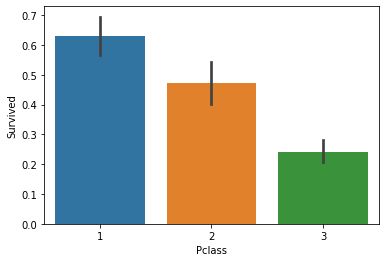

In [99]:
class_survirors_percent = {}
for passenger_class in train.Pclass.unique():
    print(f"{passenger_class} Class passengers: {train[train.Pclass == passenger_class].Pclass.count()}")
    class_survirors_percent[passenger_class] = train[(train['Survived']) & (train['Pclass'] == passenger_class)]['Survived'].sum() / survivors

print(class_survirors_percent)
sns.barplot(x="Pclass", y="Survived", data=train);

We can clearly see that each class holds a different survival rate; first class passengers have the highest likelihood of survival and 3rd class the lowest; conversely when looking at the total number of survivors, class 2 had the fewest, which indicates that 2nd class was scarcely populated

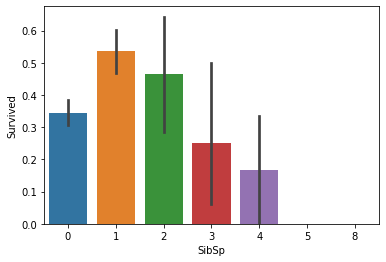

In [100]:
# Other significant features

# Survival rates by number of Siblings / Spouses
sns.barplot(x="SibSp", y="Survived", data=train);

The highest survival rate is for people with only one Sibling/Spouse, followed by 2 and 0. Personal interpretation: having help from one person (or two) leads to better survival compared to being alone; having too many siblings skews data (more likely that some of the siblings die) and it might be difficult to help all your siblings survive

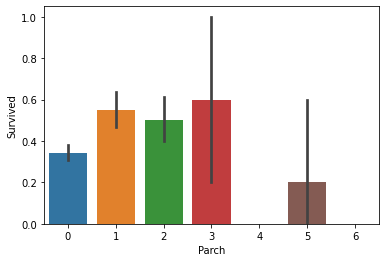

In [101]:
# Survival rates by number of parents / children
sns.barplot(x="Parch", y="Survived", data=train);

Similarly to before, people without the help of family have less chances of survival.

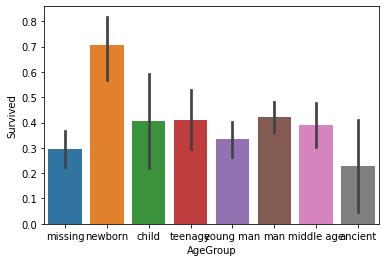

In [102]:
# Divide ages in bins
train.Age = train.Age.fillna(-0.5)
age_bins = [-1, 0, 5, 13, 18, 25, 40, 60, 999]
labels = ["missing", "newborn", "child", "teenage", "young man", "man", "middle age", "ancient"]
train["AgeGroup"] = pd.cut(train["Age"], age_bins, labels=labels)
sns.barplot(x="AgeGroup", y="Survived", data=train);

Seems like children have the highest chances of survival, all other groups more or less homogeneous except for very old people. I would have expected teenagers to be more likely to live.

# Data pre-processing
We want to figure out which features to keep, which to delete, what to do with missing values.

In [103]:
# First of all, let's separate in bins the ages for the test dataset like we did for train
test.Age = test.Age.fillna(-0.1)
test["AgeGroup"] = pd.cut(test.Age, age_bins, labels=labels)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,man
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,middle age
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,ancient
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,man
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,young man


In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,man
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,man
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,man
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man


Both have the same features except for "Survived", which will be our target.

In [105]:
# Remove Cabin feature: we don't know how to interpret the cabin position from its name. Cabin position might have to do with survival, but we have no way of knowing it.
try:
    train = train.drop("Cabin", axis=1)
    test = test.drop("Cabin", axis=1)
except:
    # Already removed
    pass
# Remove ticket as well, it probably has no meaning
try:
    train = train.drop("Ticket", axis=1)
    test = test.drop("Ticket", axis=1)
except:
    # Already removed
    pass

In [106]:
# The embarked feature represents the port at which the passenger embarked.
train.Embarked.size - train.Embarked[train.Embarked.notna()].size  # 2
# We only have two missing values, we can simply fill them with the most common option
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [107]:
# Fill missing values with S
train.Embarked = train.Embarked.fillna("S")
# Check and do the same for test dataset
test.Embarked.value_counts()  # No missing values

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## Filling missing Age values
Age is missing a lot of values; we can however try to estimate the age of a person by their 'title'.
We will extract the title as words in their name ending with a dot '.' and go from there.

In [108]:
for dataset in [train, test]:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can see how some titles are very rare, we will group those together.

In [109]:
titles = train.Title.value_counts()
rare_titles = [k for k, v in titles.items() if v < 10]

for dataset in [train, test]:
    dataset.Title = dataset.Title.replace(rare_titles, "Rare")

pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Master,0,40
Miss,182,0
Mr,0,517
Mrs,125,0
Rare,7,20


In [110]:
# Fill missing values for "Age" by taking the mode of others with the same Title (title is often associated with age)
titles = train.Title.unique()

for title in titles:
    mode = train[train.Title == title].AgeGroup.mode()[0]
    train.AgeGroup = train.AgeGroup.replace("missing", mode)


0      young man
1            man
2            man
3            man
4            man
         ...    
886          man
887    young man
888      missing
889          man
890          man
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): ['missing' < 'newborn' < 'child' < 'teenage' < 'young man' < 'man' < 'middle age' < 'ancient']
0      young man
1            man
2            man
3            man
4            man
         ...    
886          man
887    young man
888          man
889          man
890          man
Name: AgeGroup, Length: 891, dtype: category
Categories (7, object): ['newborn' < 'child' < 'teenage' < 'young man' < 'man' < 'middle age' < 'ancient']
